##Projet 1: Customer Segmentation

**Objective:**
Segment customers into homogeneous groups to create better marketing strategies.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


###Descriptive Analysis

The dataset has 200 customers with the following features:

- Age ranges from 18 to 70 years.

- Annual income ranges from $15k to $137k.

- Spending score ranges from 1 to 99.

The average age is about 39 years, and the average annual income is about $60k.
These statistics show a wide variety of customer profiles.


###Data Analysis

We analyze age, annual income, and spending score to understand customer behavior.


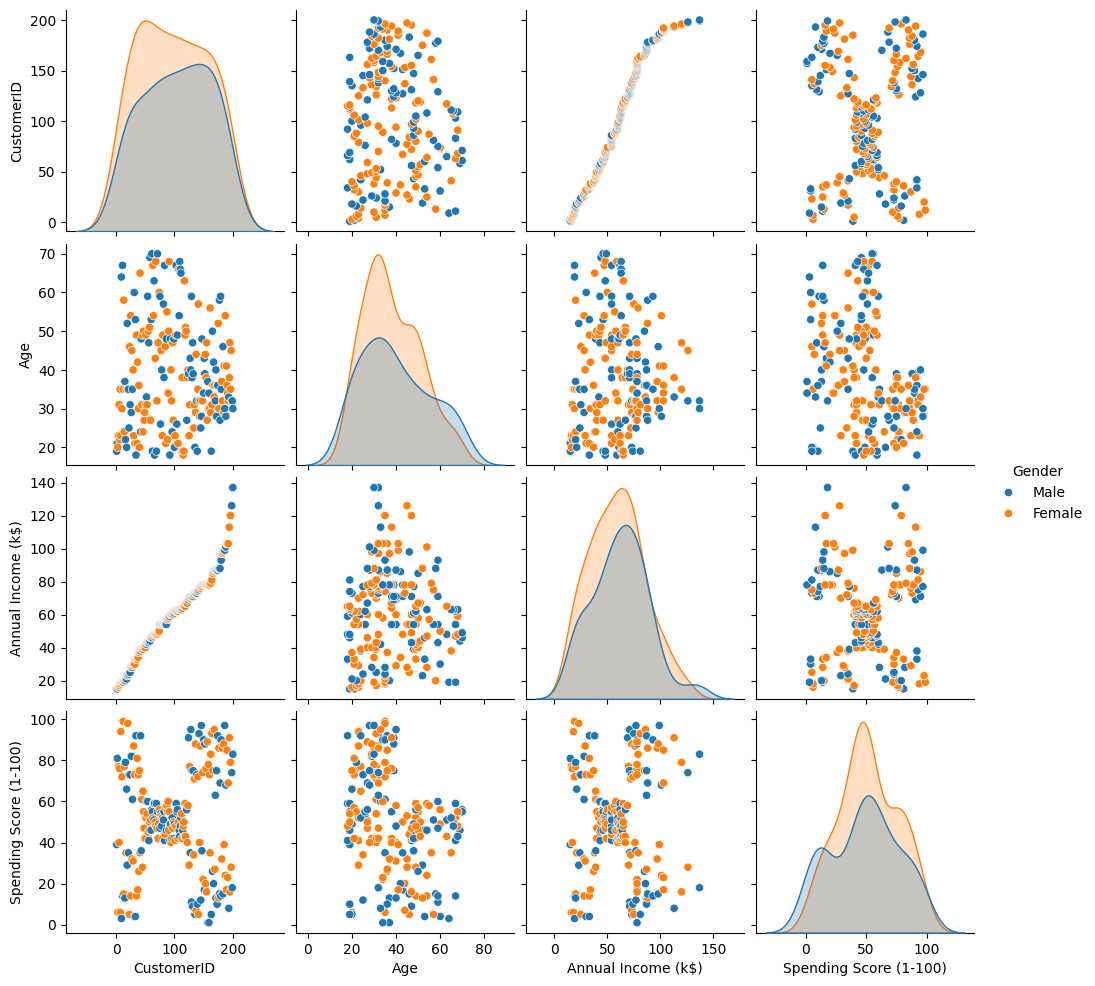

In [30]:
sns.pairplot(df, hue="Gender")
plt.show()


In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


###Exploratory Analysis

The pairplot shows the relationships between variables.
We can see that spending score is not directly proportional to annual income.
This justifies using clustering algorithms to find groups of customers with similar behavior.

The elbow method suggests that K=5 is a good choice for the number of clusters.


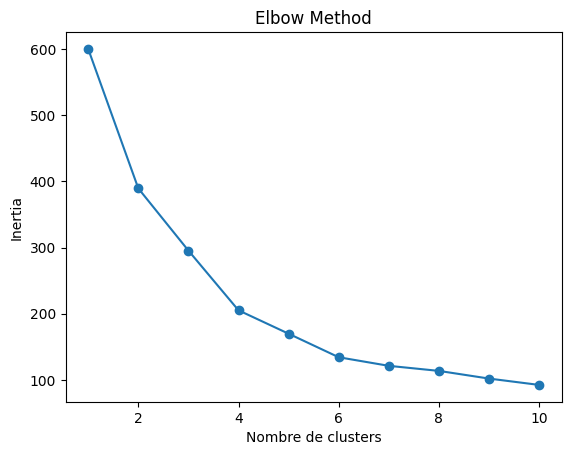

In [32]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

###Clustering Method: K-Means

We use the K-Means algorithm to segment the customers.
It groups customers into K clusters by minimizing the distance inside each cluster.
We choose K=5 to get detailed segmentation.

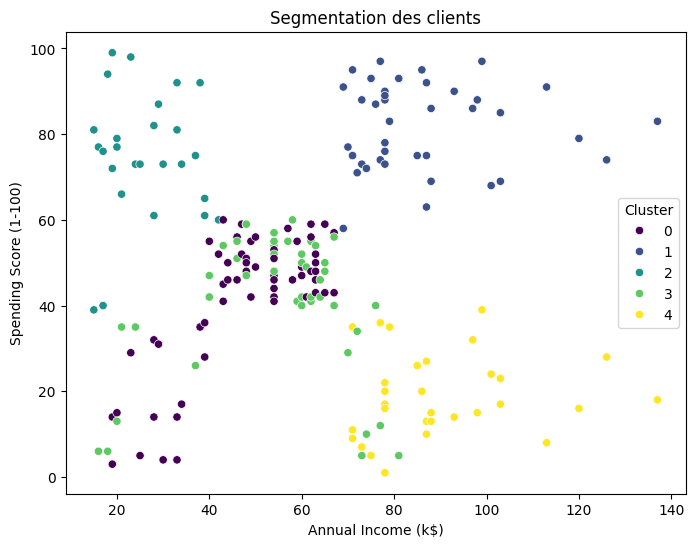

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis'
)
plt.title("Segmentation des clients")
plt.show()


Cluster Interpretation

- Cluster 0: High income and high spending → VIP customers.

- Cluster 1: Medium income and low spending → promotion-sensitive customers.

- Cluster 2: Young customers with high loyalty potential.

- Cluster 3: Low income and low spending → low-value customers.

- Cluster 4: High income but low spending → potential to activate.

### Agglomerative Clustering


In [34]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5)
df['Cluster_Agg'] = agg.fit_predict(X_scaled)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Agg
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,3,4
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,4


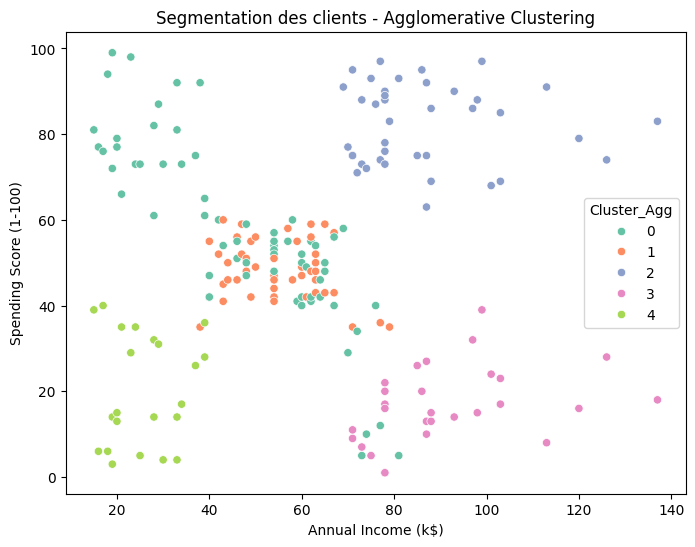

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_Agg',
    data=df,
    palette='Set2'
)
plt.title("Segmentation des clients - Agglomerative Clustering")
plt.show()


We also apply Agglomerative Hierarchical Clustering to compare with K-Means.
The clusters are generally similar, which confirms that the segmentation is consistent.

# Projet 2 : Credit Card Fraud Detection
**Objective**

Detect fraudulent credit card transactions using supervised machine learning.

###Load and explore the dataset

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("creditcard.csv")

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**explanation**

The dataset contains credit card transactions made by European cardholders.
Each row represents one transaction.
The variable Class indicates whether the transaction is fraudulent or not:

- Class = 0 : Normal transaction

- Class = 1 : Fraudulent transaction

Most features (V1 to V28) are numerical variables obtained after PCA transformation.
The dataset also contains Time and Amount features.

###Class distribution (Fraud vs Normal)




In [38]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


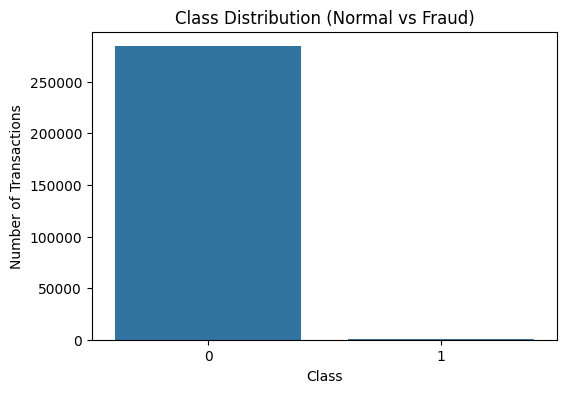

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (Normal vs Fraud)")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.show()

**explanation**

The dataset is highly imbalanced.
Most transactions are normal, while only a very small number are fraudulent.

This class imbalance makes fraud detection difficult.
A model that predicts all transactions as normal would have high accuracy but would fail to detect fraud.

**Note:**

Because the dataset is imbalanced, accuracy alone is not a reliable metric.
Therefore, we will focus on precision, recall, and F1-score to evaluate the models.

###Data Preparation

**Separate features and target**

In [40]:
X = df.drop('Class', axis=1)
y = df['Class']


We separate the dataset into:

- X: input features (all variables except Class)

- y: target variable (Class: fraud or normal)

**Train / Test split**

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Feature scaling**

Only Time and Amount need scaling.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])


The features Time and Amount are scaled using StandardScaler.
This helps the model learn better and improves performance.

**Handling class imbalance (SMOTE)**

In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

y_train_res.value_counts()


,count
Class,
0,227451
1,227451


SMOTE is used to handle class imbalance.
It creates synthetic fraud samples to balance the dataset.
This helps the model detect fraud more effectively.

###Build a supervised classification model

We start with Logistic Regression as a baseline model.

**Train Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)


LogisticRegression(max_iter=1000, random_state=42)

**Predictions**

In [45]:
y_pred = model.predict(X_test)


###Model evaluation

**Classification report**

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



**Confusion Matrix**

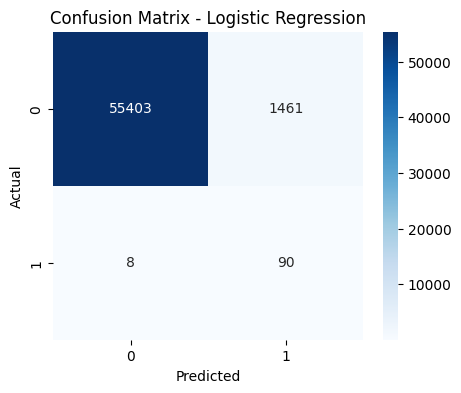

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


###AutoML: TPOT

In [48]:
!pip install --upgrade tpot


In [49]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split